<table align="center" width=90%>
    <tr>
      <td width="20%">
            <img src="project-image.webp">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=500px>
                    <h4> Capstone Project <br><small> Predicting readmission of Diabetic patient</small>
                    </h4>
                </font>
            </div>
        </td>
    </tr>
</table>

### **Introduction:**

Diabetes is an illness caused because of high glucose level in a human body. Nowadays, diabetes is a major public health challenge and a worldwide problem. Diabetes should not be ignored, if it is untreated then it may cause chronic damage and disfunction of various tissues, especially the eyes, kidneys, heart, blood vessels, and nerves . Diabetes can be controlled if it is predicted earlier.

### Problem Statement:

To build a model that accurately predicts whether the patients having diabetes is readmitting or not after taking the medication. 


### About the data set

The dataset contains information of diabetic patients. The aim is to find whether the patients having diabetes is readmitting or not after taking the medications. 

**Attribute information:**

**Encounter ID :**	Unique identifier of an encounter

**Patient number :** Unique identifier of a patient

**Race Values :** Caucasian, Asian, African American, Hispanic, and other

**Gender Values :** male, female, and unknown/invalid

**Age :** Grouped in 10-year intervals: [0, 10), [10, 20), ..., [90, 100)

**Weight :** Weight in pounds.

**Admission type :** identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available.

**Discharge disposition :** Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available.

**Admission source :**	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital.

**Time in hospital :**	Integer number of days between admission and discharge.

**Payer code :** identifier corresponding to 17 distinct values, for example, Blue Cross\Blue, Shield, Medicare, and self-pay.

**Medical specialty :**	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct, values, for example, cardiology, internal medicine, family\general practice, and surgeon.

**Number of lab procedures :**	Number of lab tests performed during the encounter.

**Number of procedures :**	Number of procedures (other than lab tests) performed during the encounter.

**Number of medications :**	Number of distinct generic names administered during the encounter.

**Number of outpatient visits :** Number of outpatient visits of the patient in the year preceding the encounter.

**Number of emergency visits :** Number of emergency visits of the patient in the year preceding the encounter.

**Number of inpatient visits :** Number of inpatient visits of the patient in the year preceding the encounter.

**Diagnosis 1 :** The primary diagnosis (coded as first three digits of ICD9); 713 distinct values.

**Diagnosis 2 :** Secondary diagnosis (coded as first three digits of ICD9); 740 distinct values.

**Diagnosis 3 :** Additional secondary diagnosis (coded as first three digits of ICD9); 786 distinct values.

**Number of diagnoses :** Number of diagnoses entered to the system.

**Glucose serum test result :**	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,”“normal,” and “none” if not measured.

**A1c test result :** Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

**Change of medications :**	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”.

**Diabetes medications :** Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”.

**23 features for medications**

**Generic names:** metformin, repaglinide, nateglinide, chlorpropamide,glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone, the feature indicates whether  the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed.

**Readmitted (Target Variable) :** Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission.


## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1  - **[Read the Data](#read)**
    - 2.2  - **[Check the Data Type](#dtype)**
    - 2.3  - **[Target variable analysis](#target)**
    - 2.4  - **[Remove Insignificant Variables](#drop)**
    - 2.5  - **[Dealing with Missing Values](#null)**
    - 2.6  - **[Univariate Analysis](#uni)**
    - 2.7  - **[Bivariate Analysis](#bi)**
    - 2.8  - **[Feature Extraction](#significant)**
    - 2.9 - **[Encoding](#encode)**
    - 2.10 - **[Train-Test Split](#split)**
3. **[Model Building](#model)**
    - 3.1  - **[Logisitic Regression without SMOTE](#logit)**
    - 3.2  - **[Decision Tree without SMOTE](#dt)**
    - 3.3  - **[Random Forest  without SMOTE](#rf)**
    - 3.4  - **[Logisitic Regression with SMOTE](#logitsm)**
    - 3.5  - **[Decision Tree with SMOTE](#dtsm)**
    - 3.6  - **[Random Forest  with SMOTE](#rfsm)**
    - 3.7  - **[AdaBoost with SMOTE](#adasm)**
    - 3.8  - **[Gradient Boosting with SMOTE](#gbsm)**
    - 3.9  - **[XG Boosting with SMOTE](#xgsm)**
4. **[Business Interpretation](#business)**

### Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sma
import category_encoders as ce
import scipy
import scipy.stats as stats
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import tree

from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,roc_auc_score,\
ConfusionMatrixDisplay,cohen_kappa_score

### Data preparation
### Load the dataset

In [2]:
df = pd.read_csv("diabetic_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Shape of datasets

In [3]:
df.shape

(101766, 50)

In [4]:
df.select_dtypes(include =np.number).shape

(101766, 13)

In [5]:
df.select_dtypes(exclude = np.number).shape

(101766, 37)

#### Checking for the datatypes

In [6]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

### Five Point Summary

In [7]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [8]:
df.describe(exclude = np.number)

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,18,73,717,749,790,4,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,?,?,428,276,250,None,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,40256,49949,6862,6752,11555,96420,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


### Analysis of target variable

In [9]:
df["readmitted"].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

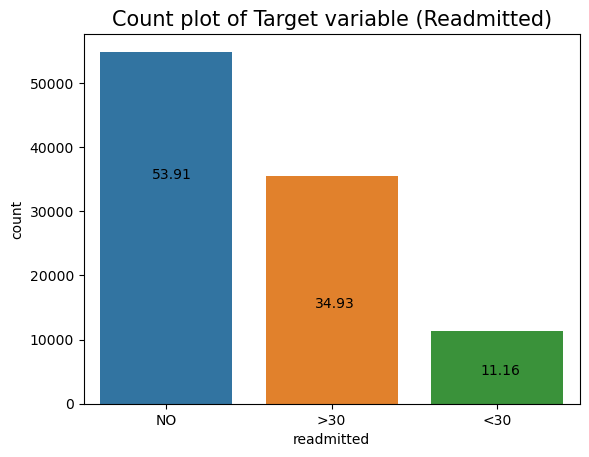

In [10]:
sns.countplot(x = df["readmitted"])

plt.title("Count plot of Target variable (Readmitted)", fontsize = 15)

plt.text(x = -0.09, y = 35000, s = round((df["readmitted"].value_counts()[0]/df.shape[0]) * 100, 2))
plt.text(x = 0.9, y = 15000, s = round((df["readmitted"].value_counts()[1]/df.shape[0]) * 100, 2))
plt.text(x = 1.9, y = 4500, s = round((df["readmitted"].value_counts()[2]/df.shape[0])* 100, 2))

plt.show()

Since our problem statement deals with whether a patient gets readmitted after 30 days or not, we are changing the value "No" and ">30" as 0 and "<30" as 1.

In [11]:
df["readmitted"].replace({"NO" : 0, ">30" : 0, "<30" : 1}, inplace = True)

In [12]:
df["readmitted"].value_counts()

0    90409
1    11357
Name: readmitted, dtype: int64

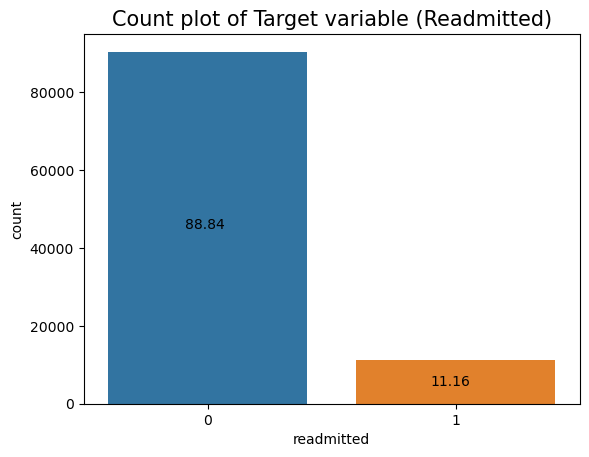

In [13]:
sns.countplot(x = df["readmitted"])

plt.title("Count plot of Target variable (Readmitted)", fontsize = 15)

plt.text(x = -0.09, y = 45000, s = round((df["readmitted"].value_counts()[0]/df.shape[0]), 4) * 100)
plt.text(x = 0.9, y = 4500, s = round((df["readmitted"].value_counts()[1]/df.shape[0]), 4) * 100)

plt.show()

The patient who doesn't get readmitted(denoted by 0) are about 89% and who gets readmitted(denoted by 1) are about 11%. This clearly indicates imbalanced data.

### Remove Insignificant variables

We can remove encounter_id and patient_nbr. Since this will be unique for each encounter and patients.

In [14]:
df["encounter_id"].nunique()

101766

In [15]:
df["patient_nbr"].nunique()

71518

In [16]:
df.drop(["encounter_id", "patient_nbr"], axis = 1, inplace = True)

In [17]:
df.shape

(101766, 48)

In [18]:
for i in df.columns:
    if df[i].nunique() == 1:
        print(i)

examide
citoglipton


The two medicines "examide" and "citoglipton" have only one values. So we can remove those variables.

In [19]:
df["examide"].unique()

array(['No'], dtype=object)

In [20]:
df["citoglipton"].unique()

array(['No'], dtype=object)

In [21]:
df.drop(["examide", "citoglipton"], axis = 1, inplace = True)

In [22]:
df.shape

(101766, 46)

### Changing datatypes of the variables

In [23]:
df["admission_type_id"].value_counts()

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

Below is the data we obtained from internet regarding various admission type Ids

### admission_type_id      Description

           1                 Emergency
           2                 Urgent
           3                 Elective
           4                 Newborn
           5                 Not Available
           6                 Null
           7                 Trauma centr
           8                 Not mapped

In [24]:
def admission_type_desc(x):
    if x == 1 or x == 2:
        return "Emergency"
    elif x == 3:
        return "Elective"
    else:
        return "Other"

In [25]:
df["admission_type_id"] = df["admission_type_id"].apply(admission_type_desc)

In [26]:
df["admission_type_id"].value_counts()

Emergency    72470
Elective     18869
Other        10427
Name: admission_type_id, dtype: int64

In [27]:
df["discharge_disposition_id"].value_counts()

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

Below is the data we obtained from internet regarding various discharge_disposition_id

### discharge_disposition_id      Description

            1	Discharged to home
            2	Discharged/transferred to another short term hospital
            3	Discharged/transferred to SNF
            4	Discharged/transferred to ICF
            5	Discharged/transferred to another type of inpatient care institution
            6	Discharged/transferred to home with home health service
            7	Left AMA
            8	Discharged/transferred to home under care of Home IV provider
            9	Admitted as an inpatient to this hospital
            10	Neonate discharged to another hospital for neonatal aftercare
            11	Expired
            12	Still patient or expected to return for outpatient services
            13	Hospice / home
            14	Hospice / medical facility
            15	Discharged/transferred within this institution to Medicare approved swing bed
            16	Discharged/transferred/referred another institution for outpatient services
            17	Discharged/transferred/referred to this institution for outpatient services
            18	NULL
            19	Expired at home. Medicaid only, hospice.
            20	Expired in a medical facility. Medicaid only, hospice.
            21	Expired, place unknown. Medicaid only, hospice.
            22	Discharged/transferred to another rehab fac including rehab units of a hospital .
            23	Discharged/transferred to a long term care hospital.
            24	Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
            25	Not Mapped
            26	Unknown/Invalid
            30	Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere
            27	Discharged/transferred to a federal health care facility.
            28	Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of hospital
            29	Discharged/transferred to a Critical Access Hospital (CAH).

In [28]:
def discharge_disposition_type(x):
    if x == 1:
        return "Discharged"
    elif x in [2, 3, 4, 5, 6, 8, 15, 16, 17, 22, 23, 24, 27, 28, 29, 30]:
        return "Tranferred"
    else:
        return "Other"

In [29]:
df["discharge_disposition_id"] = df["discharge_disposition_id"].apply(discharge_disposition_type)

In [30]:
df["discharge_disposition_id"].value_counts()

Discharged    60234
Tranferred    33776
Other          7756
Name: discharge_disposition_id, dtype: int64

In [31]:
df["admission_source_id"].value_counts()

7     57494
1     29565
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
14        2
11        2
25        2
13        1
Name: admission_source_id, dtype: int64

Below is the data we obtained from internet regarding various admission_source_id

### admission_source_id      Description

            1	Physician Referral
            2	Clinic Referral
            3	HMO Referral
            4	Transfer from a hospital
            5	Transfer from a Skilled Nursing Facility (SNF)
            6	Transfer from another health care facility
            7	Emergency Room
            8	Court/Law Enforcement
            9	Not Available
            10	Transfer from critial access hospital
            11	Normal Delivery
            12	Premature Delivery
            13	Sick Baby
            14	Extramural Birth
            15	Not Available
            17	NULL
            18	Transfer From Another Home Health Agency
            19	Readmission to Same Home Health Agency
            20	Not Mapped
            21	Unknown/Invalid
            22	Transfer from hospital inpt/same fac reslt in a sep claim
            23	Born inside this hospital
            24	Born outside this hospital
            25	Transfer from Ambulatory Surgery Center
            26	Transfer from Hospice

In [32]:
def admission_source_type(x):
    if x in [1, 2, 3, 4, 5, 6, 10, 18, 22, 25, 26]:
        return('Referral/Transfer')
    elif x == 7:
        return('Emergency')
    else:
        return('Other')

In [33]:
df["admission_source_id"] = df["admission_source_id"].apply(admission_source_type)

In [34]:
df["admission_source_id"].value_counts()

Emergency            57494
Referral/Transfer    37184
Other                 7088
Name: admission_source_id, dtype: int64

In [35]:
df.dtypes

race                        object
gender                      object
age                         object
weight                      object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide           

### Check for missing values

In [36]:
df.isnull().sum()

race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose  

Even though there are no missing values, there are many places we could find the question mark(?). We can replace the '?' with nan values.

In [37]:
df.replace({"?" : np.nan}, inplace = True)

In [38]:
missing_values = pd.DataFrame(df.isnull().sum(), index = df.columns, columns = ["Missing Values"])
missing_values[missing_values["Missing Values"] != 0].sort_values('Missing Values', ascending = False)

,Missing Values
weight,98569
medical_specialty,49949
payer_code,40256
race,2273
diag_3,1423
diag_2,358
diag_1,21


In [39]:
missing_percent = pd.DataFrame((df.isnull().sum()/df.shape[0]) * 100, index = df.columns, columns = ["Missing Values Percentage"])
missing_percent[missing_percent["Missing Values Percentage"] != 0].sort_values('Missing Values Percentage', ascending = False)

,Missing Values Percentage
weight,96.858479
medical_specialty,49.082208
payer_code,39.557416
race,2.233555
diag_3,1.398306
diag_2,0.351787
diag_1,0.020636


### Missing value treatment

We could find that for columns weight, medical_speciality and payer_code there are more than 40% of missing values. So we are removing those columns

In [40]:
df.drop(["weight", "medical_specialty", "payer_code"], axis = 1, inplace = True)

In [41]:
df.shape

(101766, 43)

Now we have to deal with the missing values for the columns race, diag_3, diag_2 and diag_1.

In [42]:
df["race"].unique()

array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [43]:
df["race"].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

We have a category called "other" in the race column. So we are going to replace the null value with the "other".

In [44]:
df["race"].fillna("Other", axis = 0, inplace = True)

In [45]:
df["race"].unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [46]:
df["race"].value_counts()

Caucasian          76099
AfricanAmerican    19210
Other               3779
Hispanic            2037
Asian                641
Name: race, dtype: int64

Else we can replace the null values with the mode of the data.

#### Now we need to impute the missing values in "diag_1", "diag_2" and "diag_3" column

In [47]:
#according to this detail ICD-9
#https://en.wikipedia.org/wiki/List_of_ICD-9_codes_390%E2%80%93459:_diseases_of_the_circulatory_system

In [48]:
df.shape

(101766, 43)

In [49]:
df.dropna(inplace=True)
df.reset_index(drop = True, inplace = True)

In [50]:
df.shape

(100244, 43)

In [51]:
col = ["diag_1","diag_2","diag_3"]

In [52]:
for i in col:
    df[i] = df[i].apply(lambda x: "supplementry classification" if x[0].isalpha()==True else "injury or poisning"
                      if 999>=float(x)>=800 else "Symptoms, Signs and Ill-defined Conditions"
                      if 799>=float(x)>=760 else "Congenital Anomalies"
                      if 759>=float(x)>=740 else "Diseases of the Musculoskeletal"
                      if 739>=float(x)>=710 else "Diseases of the Skin and Subcutaneous Tissue"
                      if 709>=float(x)>=680 else "Complications of Pregnancy"
                      if 679>=float(x)>=630 else "Diseases of the Genitourinary System"
                      if 629>=float(x)>=580 else "Diseases of the Digestive System"
                      if 579>=float(x)>=520 else "Diseases of the Respiratory System"
                      if 519>=float(x)>=460 else "Diseases of the Circulatory System"
                      if 459>=float(x)>=390 else "Diseases of the Nervous System"
                      if 389>=float(x)>=320 else "Mental Disorders"
                      if 319>=float(x)>=290 else "Diseases of the Blood and Blood-forming Organs"
                      if 289>=float(x)>=280 else "Endocrine, Nutritional and Metabolic Diseases"
                      if 279>=float(x)>=240 else "Neoplasms"
                      if 239>=float(x)>=140 else "Infectious and Parasitic Diseases"
                      if 139>=float(x)>=1 else "other")

In [53]:
df["diag_1"].value_counts()

Diseases of the Circulatory System                30207
Endocrine, Nutritional and Metabolic Diseases     10816
Diseases of the Respiratory System                10328
Diseases of the Digestive System                   9098
Symptoms, Signs and Ill-defined Conditions         7566
injury or poisning                                 6836
Diseases of the Genitourinary System               5036
Diseases of the Musculoskeletal                    4858
Neoplasms                                          3390
Infectious and Parasitic Diseases                  2758
Diseases of the Skin and Subcutaneous Tissue       2491
Mental Disorders                                   2222
supplementry classification                        1638
Diseases of the Nervous System                     1195
Diseases of the Blood and Blood-forming Organs     1093
Complications of Pregnancy                          661
Congenital Anomalies                                 51
Name: diag_1, dtype: int64

In [54]:
df["diag_2"].value_counts()

Diseases of the Circulatory System                31288
Endocrine, Nutritional and Metabolic Diseases     20219
Diseases of the Respiratory System                10224
Diseases of the Genitourinary System               7964
Symptoms, Signs and Ill-defined Conditions         4592
Diseases of the Digestive System                   3941
Diseases of the Skin and Subcutaneous Tissue       3581
Diseases of the Blood and Blood-forming Organs     2918
Mental Disorders                                   2625
Neoplasms                                          2542
supplementry classification                        2479
injury or poisning                                 2404
Infectious and Parasitic Diseases                  1909
Diseases of the Musculoskeletal                    1760
Diseases of the Nervous System                     1276
Complications of Pregnancy                          415
Congenital Anomalies                                107
Name: diag_2, dtype: int64

In [55]:
df["diag_3"].value_counts()

Diseases of the Circulatory System                29892
Endocrine, Nutritional and Metabolic Diseases     26271
Diseases of the Respiratory System                 6769
Diseases of the Genitourinary System               6323
supplementry classification                        5053
Symptoms, Signs and Ill-defined Conditions         4520
Diseases of the Digestive System                   3571
Mental Disorders                                   3133
Diseases of the Blood and Blood-forming Organs     2487
Diseases of the Skin and Subcutaneous Tissue       2486
injury or poisning                                 1943
Diseases of the Musculoskeletal                    1914
Infectious and Parasitic Diseases                  1860
Neoplasms                                          1853
Diseases of the Nervous System                     1764
Complications of Pregnancy                          309
Congenital Anomalies                                 96
Name: diag_3, dtype: int64

#### Now remove the rows in gender which have invalid values.

In [56]:
df["gender"].value_counts()

Female             53922
Male               46319
Unknown/Invalid        3
Name: gender, dtype: int64

In [57]:
df.shape

(100244, 43)

In [58]:
df.drop(df[df["gender"] == "Unknown/Invalid"].index, inplace = True)
df.reset_index(drop = True, inplace = True)

In [59]:
df.shape

(100241, 43)

In [60]:
df.tail()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
100236,AfricanAmerican,Male,[70-80),Emergency,Tranferred,Emergency,3,51,0,16,...,No,Down,No,No,No,No,No,Ch,Yes,0
100237,AfricanAmerican,Female,[80-90),Emergency,Tranferred,Referral/Transfer,5,33,3,18,...,No,Steady,No,No,No,No,No,No,Yes,0
100238,Caucasian,Male,[70-80),Emergency,Discharged,Emergency,1,53,0,9,...,No,Down,No,No,No,No,No,Ch,Yes,0
100239,Caucasian,Female,[80-90),Emergency,Tranferred,Emergency,10,45,2,21,...,No,Up,No,No,No,No,No,Ch,Yes,0
100240,Caucasian,Male,[70-80),Emergency,Discharged,Emergency,6,13,3,3,...,No,No,No,No,No,No,No,No,No,0


## Univariate Analysis

In [61]:
df["race"].value_counts()

Caucasian          75079
AfricanAmerican    18881
Other               3672
Hispanic            1984
Asian                625
Name: race, dtype: int64

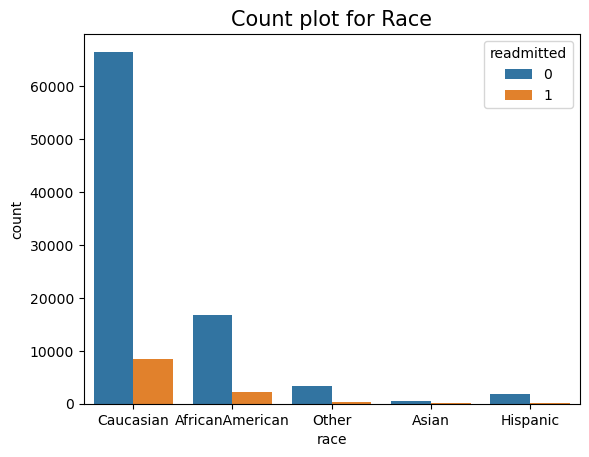

In [62]:
sns.countplot(x = df["race"], hue = df["readmitted"])
plt.title("Count plot for Race", fontsize = 15)
plt.show()

From this graph it is clear that caucasian race has the highest rate of readmission.

In [63]:
df["gender"].value_counts()

Female    53922
Male      46319
Name: gender, dtype: int64

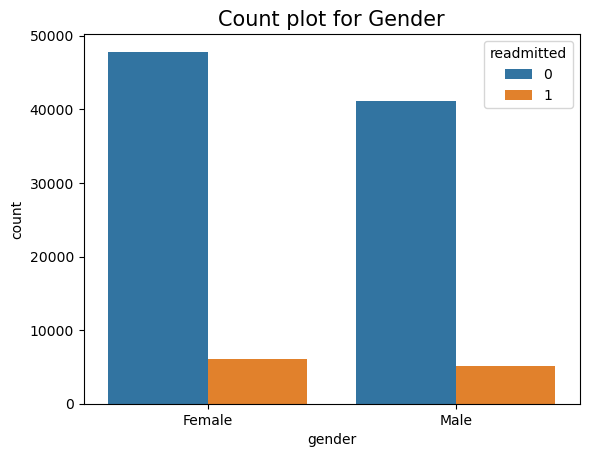

In [64]:
sns.countplot(x = df["gender"], hue = df["readmitted"])
plt.title("Count plot for Gender", fontsize = 15)
plt.show()

 As we can see Gender does not have a much impact on readmission of the patients.

In [65]:
df["age"].value_counts()

[70-80)     25896
[60-70)     22287
[80-90)     17090
[50-60)     17044
[40-50)      9474
[30-40)      3616
[90-100)     2785
[20-30)      1515
[10-20)       469
[0-10)         65
Name: age, dtype: int64

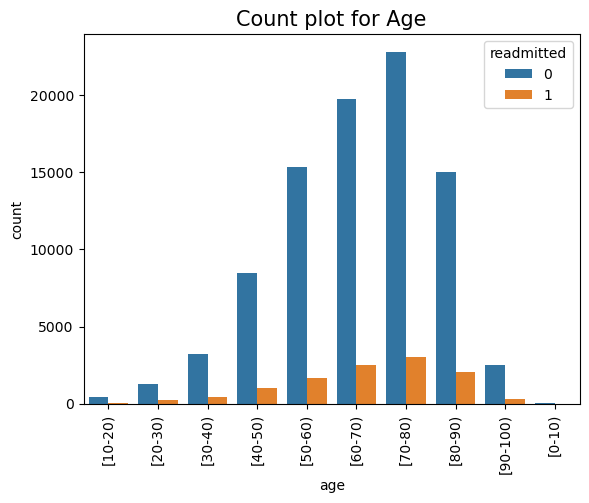

In [66]:
sns.countplot(x = df['age'], hue=df['readmitted'])

plt.title('Count plot for Age', fontsize = 15)
plt.xticks(rotation = "vertical")

plt.show()

Patients in the age range [70-80) has a higher chance of readmission followed by [60-70) and [80-90).

In [67]:
df["admission_type_id"].value_counts()

Emergency    71433
Elective     18544
Other        10264
Name: admission_type_id, dtype: int64

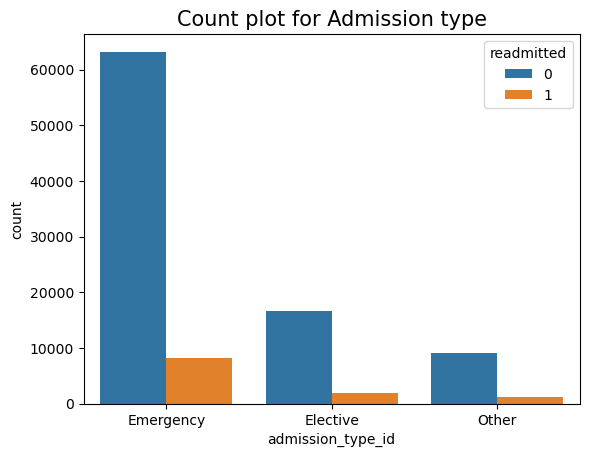

In [68]:
sns.countplot(x = df['admission_type_id'], hue=df['readmitted'])

plt.title('Count plot for Admission type', fontsize = 15)

plt.show()

Chance of readmission is high if the patient has admission type "Emergency".

In [69]:
df["discharge_disposition_id"].value_counts()

Discharged    59003
Tranferred    33587
Other          7651
Name: discharge_disposition_id, dtype: int64

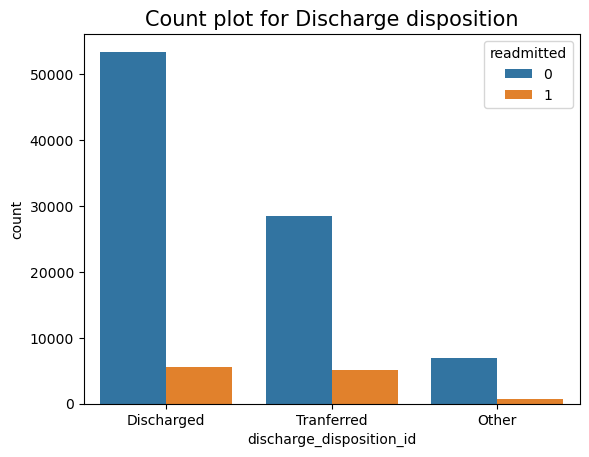

In [70]:
sns.countplot(x = df['discharge_disposition_id'], hue=df['readmitted'])

plt.title('Count plot for Discharge disposition', fontsize = 15)

plt.show()

The chance of readmission is more for discharged patients.

In [71]:
df["admission_source_id"].value_counts()

Emergency            56797
Referral/Transfer    36468
Other                 6976
Name: admission_source_id, dtype: int64

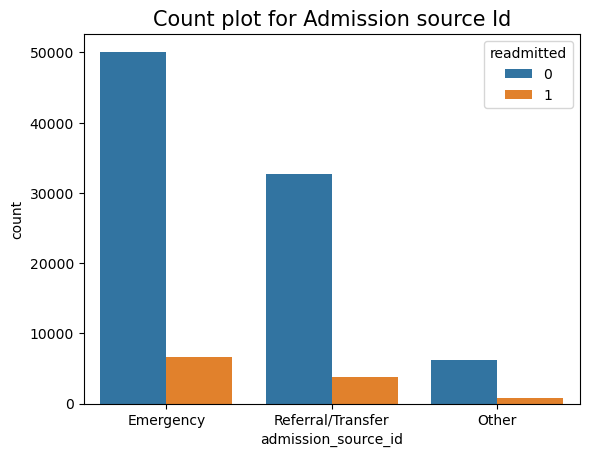

In [72]:
sns.countplot(x = df['admission_source_id'], hue=df['readmitted'])

plt.title('Count plot for Admission source Id', fontsize = 15)

plt.show()

Emergency casese are more for admission source id

In [73]:
df["time_in_hospital"].value_counts()

3     17444
2     16808
1     13791
4     13744
5      9899
6      7490
7      5831
8      4369
9      2989
10     2338
11     1847
12     1445
13     1205
14     1041
Name: time_in_hospital, dtype: int64

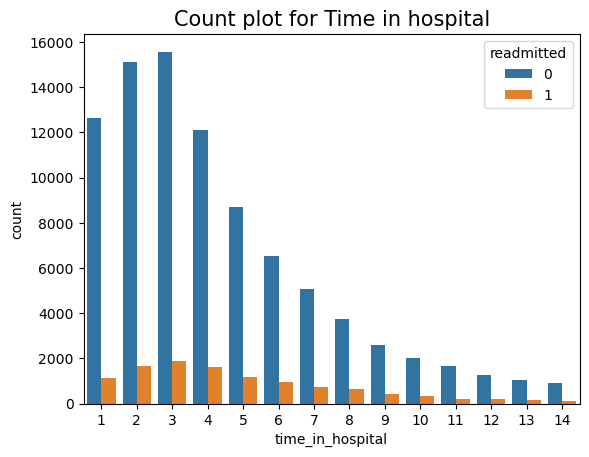

In [74]:
sns.countplot(x = df['time_in_hospital'], hue=df['readmitted'])

plt.title('Count plot for Time in hospital', fontsize = 15)

plt.show()

In [75]:
df["number_diagnoses"].value_counts()

9     49466
5     11262
8     10562
7     10374
6     10144
4      5501
3      2817
16       45
10       17
13       16
11       11
15       10
12        9
14        7
Name: number_diagnoses, dtype: int64

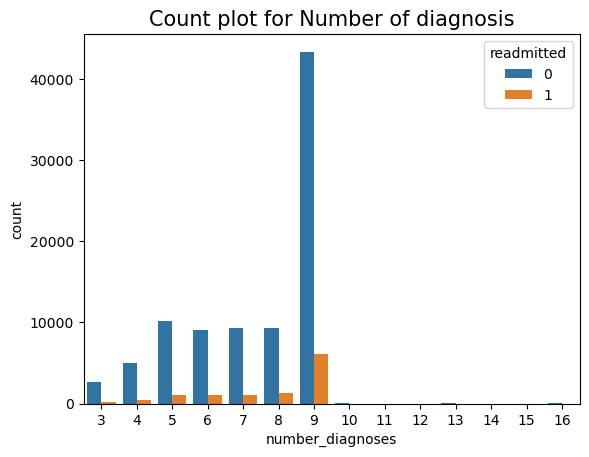

In [76]:
sns.countplot(x = df['number_diagnoses'], hue=df['readmitted'])

plt.title('Count plot for Number of diagnosis', fontsize = 15)

plt.show()

In [77]:
df["max_glu_serum"].value_counts()

None    94978
Norm     2558
>200     1467
>300     1238
Name: max_glu_serum, dtype: int64

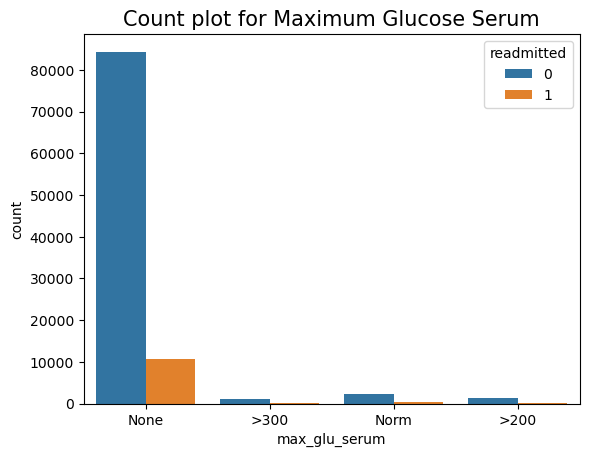

In [78]:
sns.countplot(x = df['max_glu_serum'], hue=df['readmitted'])

plt.title('Count plot for Maximum Glucose Serum', fontsize = 15)

plt.show()

In [79]:
df["A1Cresult"].value_counts()

None    83642
>8       7877
Norm     4935
>7       3787
Name: A1Cresult, dtype: int64

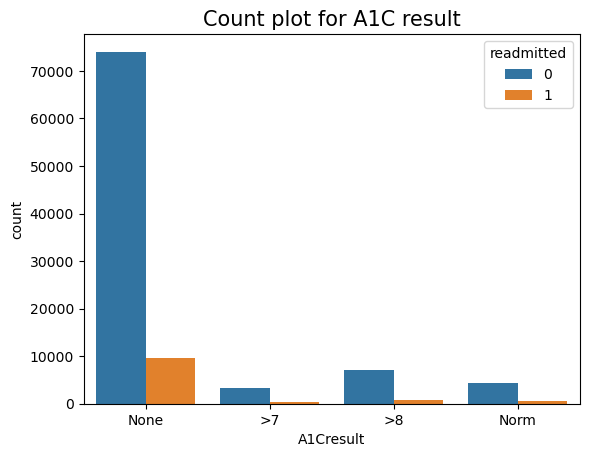

In [80]:
sns.countplot(x = df['A1Cresult'], hue=df['readmitted'])

plt.title('Count plot for A1C result', fontsize = 15)

plt.show()

In [81]:
med_df = df[['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 
              'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 
              'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
              'metformin-rosiglitazone', 'metformin-pioglitazone']]

In [82]:
df["metformin"].unique()

array(['No', 'Steady', 'Up', 'Down'], dtype=object)

In [83]:
df["insulin"].unique()

array(['Up', 'No', 'Steady', 'Down'], dtype=object)

In [84]:
df["chlorpropamide"].unique()

array(['No', 'Steady', 'Down', 'Up'], dtype=object)

All medicines have only four values: 
    
    No-if the drug was not prescribed
    Steady-if the dosage did not change
    Down-if the dosage was decreased
    Up-if the dosage was increased during the encounter

In [85]:
print(med_df[med_df["insulin"] == "Up"]["insulin"].count())
print(med_df[med_df["insulin"] == "Down"]["insulin"].count())
print(med_df[med_df["insulin"] == "Steady"]["insulin"].count())
print(med_df[med_df["insulin"] == "No"]["insulin"].count())

11152
12020
30270
46799


In [86]:
up = []
down = []
steady = []
no = []

for i in med_df.columns:
    up.append(med_df[med_df == "Up"][i].count())
    down.append(med_df[med_df == "Down"][i].count())
    steady.append(med_df[med_df == "Steady"][i].count())
    no.append(med_df[med_df == "No"][i].count())
    
med_count_df = pd.DataFrame({"Up" : up, "Down" : down, "Steady" : steady, "No" : no},index = med_df.columns)
med_count_df.sort_values(['Up','Down','Steady','No'], ascending = False, inplace = True)
med_count_df

,Up,Down,Steady,No
insulin,11152,12020,30270,46799
metformin,1045,564,18091,80541
glyburide,809,556,9160,89716
glipizide,767,557,11237,87680
glimepiride,321,192,4627,95101
pioglitazone,231,116,6897,92997
rosiglitazone,177,87,6038,93939
repaglinide,108,45,1380,98708
nateglinide,24,11,663,99543
acarbose,10,3,292,99936


A few medicines like metformin-pioglitazone, glimepiride-pioglitazone, acetohexamide, metformin-rosiglitazone and troglitazone are consumed by a very few people.

Most medicines consumed by people are Insulin and Metformin.

In [87]:
def multi_plot(features, df):
    fig, axs = plt.subplots(nrows = 7, ncols=3, figsize = (20,25))
    index = 0
    for i in range(7):
        for j in range(3):
            sns.countplot(x=features[index], hue="readmitted", data=df, ax=axs[i,j])
            index += 1

l = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

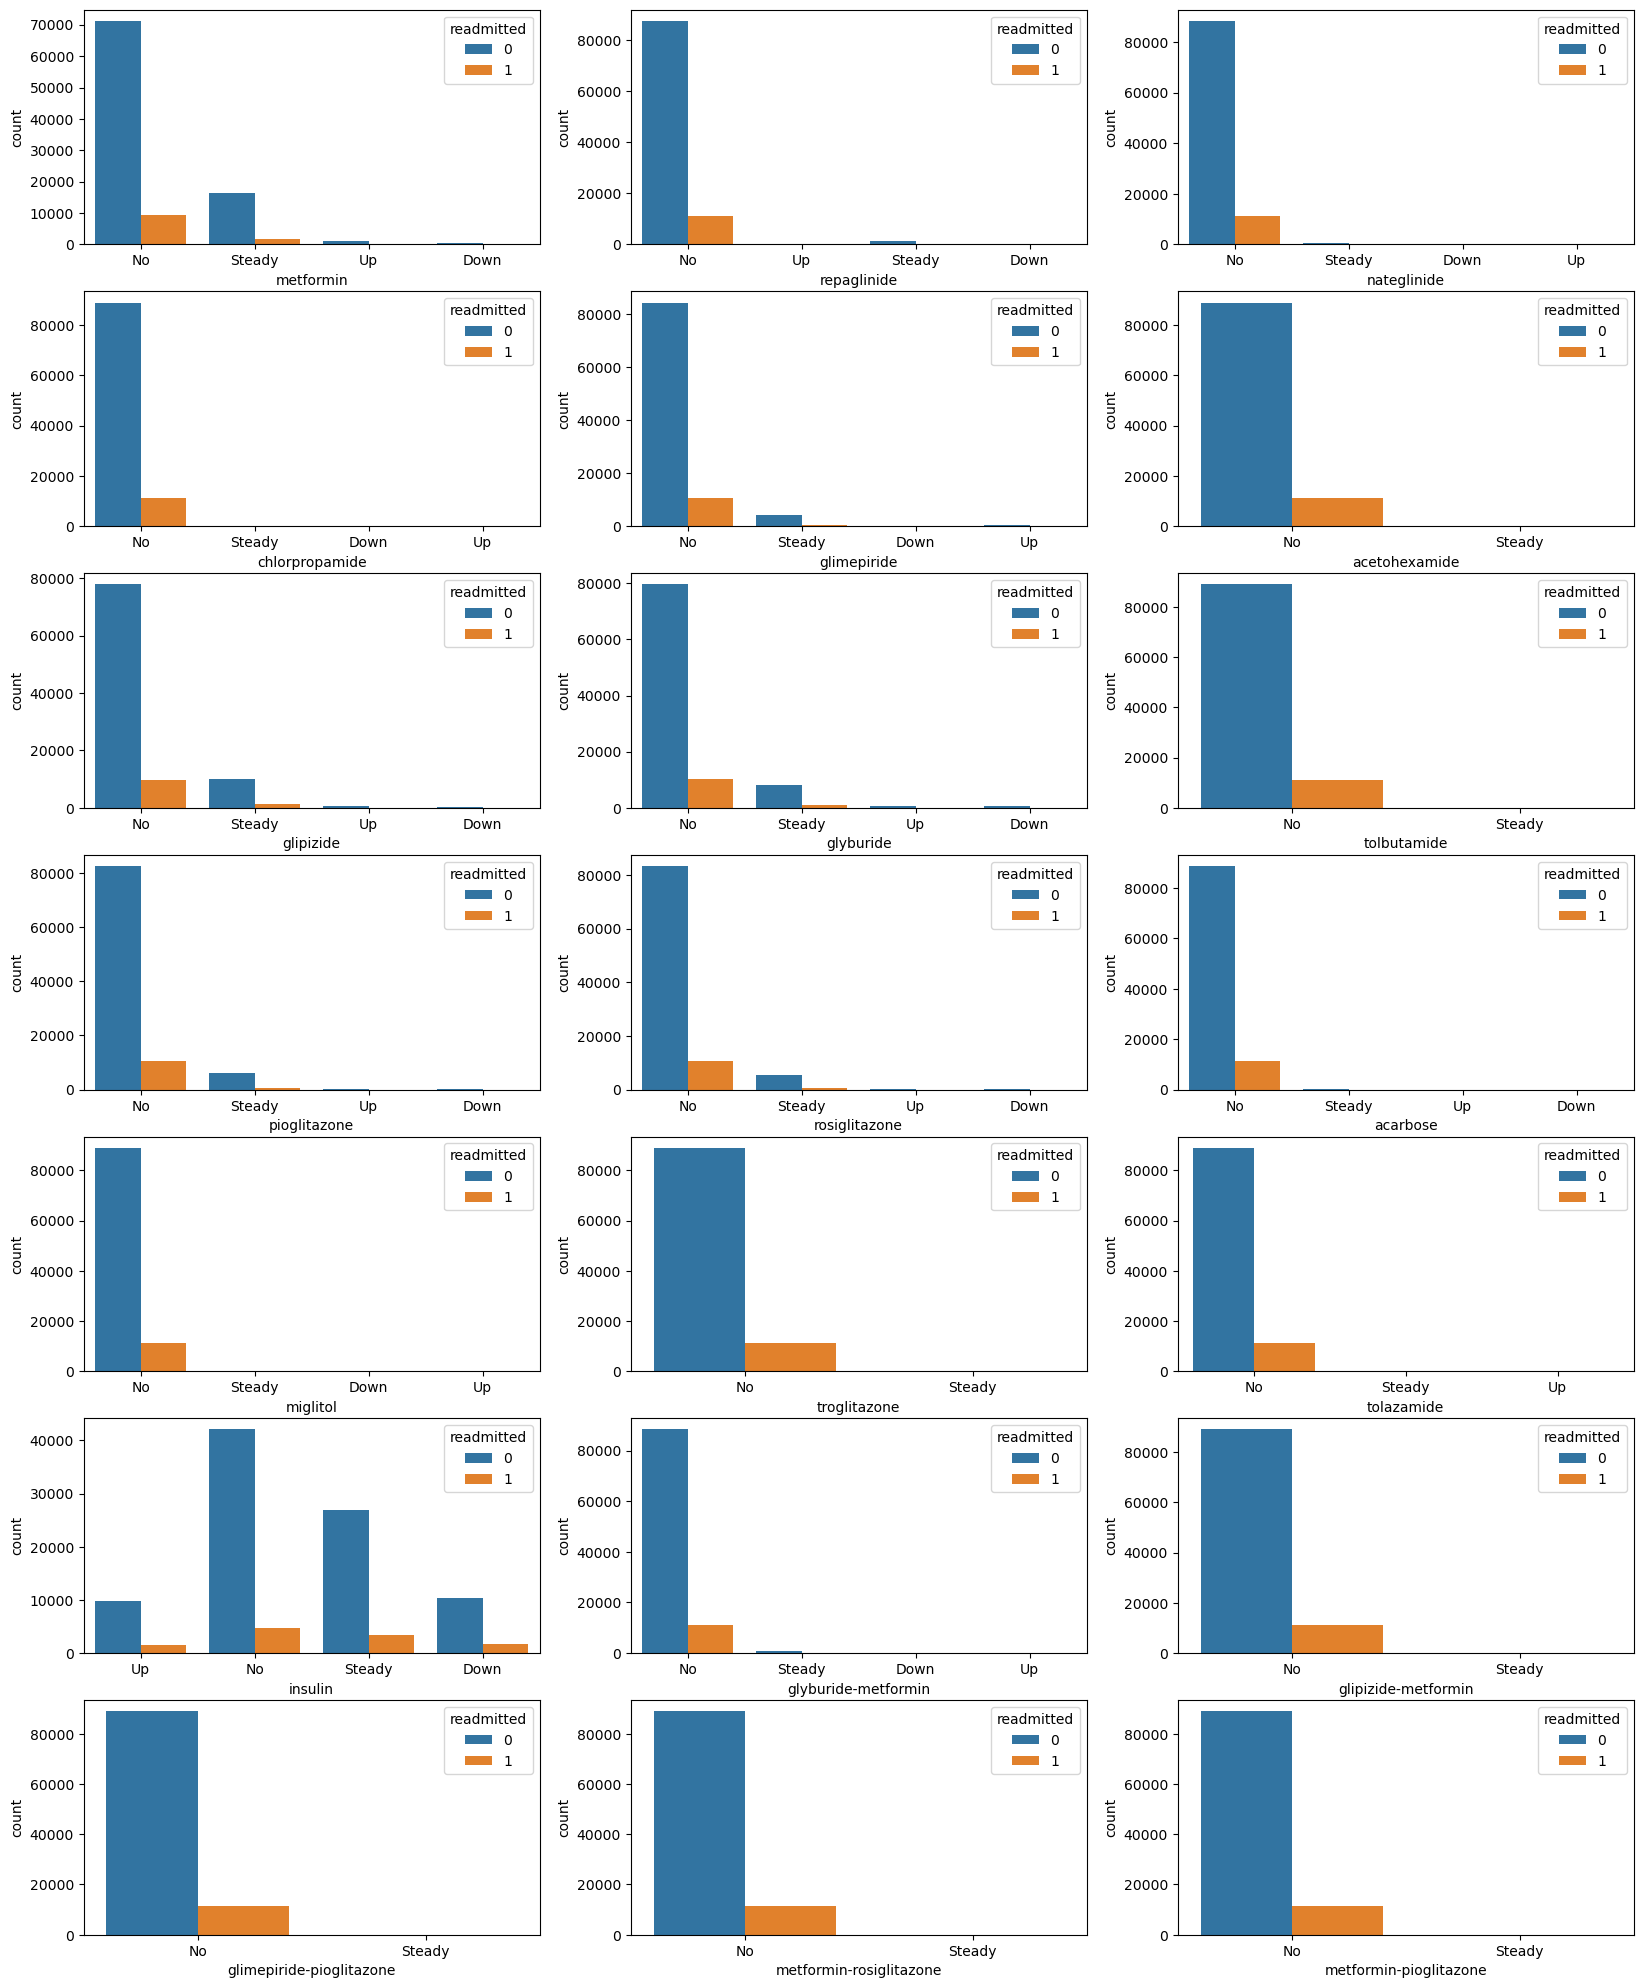

In [88]:
multi_plot(l, df)

## Bivariate Analysis

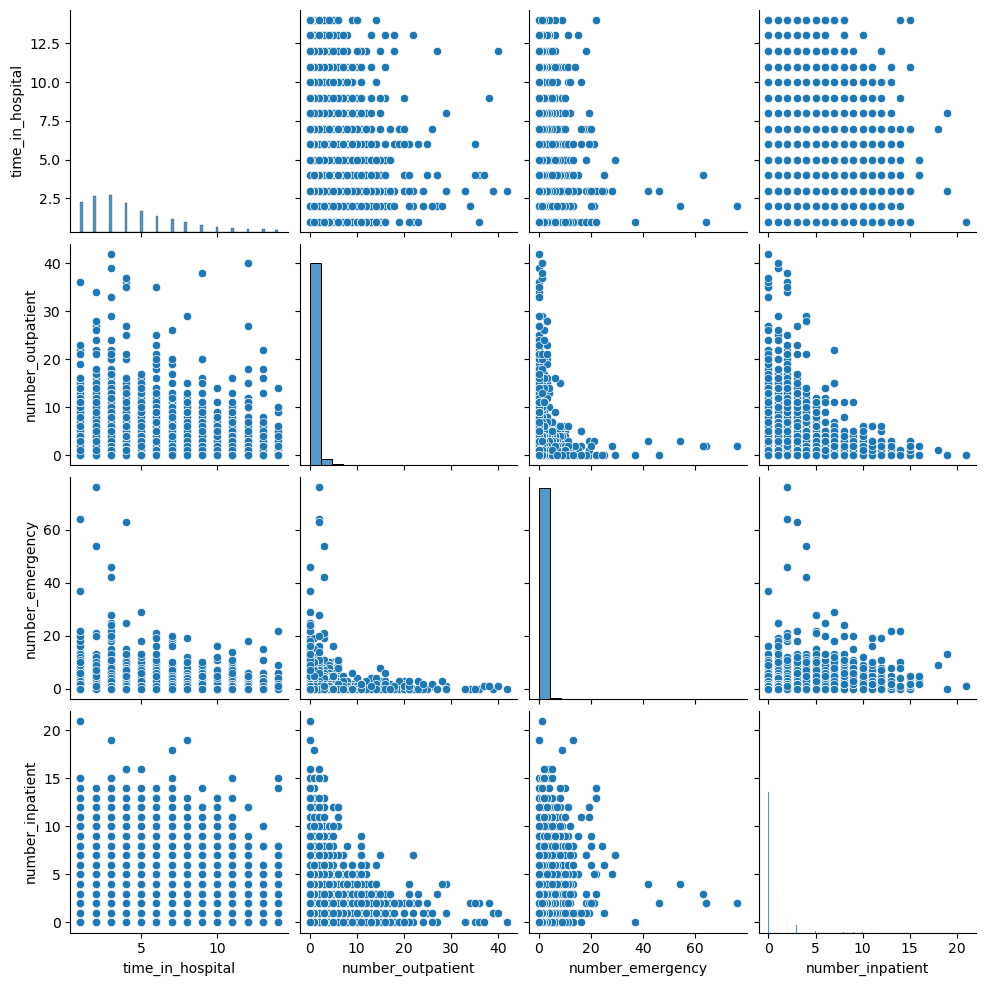

In [89]:
sns.pairplot(df[['time_in_hospital', 'number_outpatient', 'number_emergency', 'number_inpatient']])
plt.show()

## Multivariate Analysis

In [90]:
df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
    'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']].corr()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient
time_in_hospital,1.000000,0.319328,0.189262,0.463840,-0.010366,-0.010421,0.072412
num_lab_procedures,0.319328,1.000000,0.058283,0.268948,-0.007713,-0.002240,0.038665
num_procedures,0.189262,0.058283,1.000000,0.383102,-0.026398,-0.038563,-0.067989
num_medications,0.463840,0.268948,0.383102,1.000000,0.043229,0.012260,0.061969
number_outpatient,-0.010366,-0.007713,-0.026398,0.043229,1.000000,0.091531,0.107052
number_emergency,-0.010421,-0.002240,-0.038563,0.012260,0.091531,1.000000,0.267318
number_inpatient,0.072412,0.038665,-0.067989,0.061969,0.107052,0.267318,1.000000


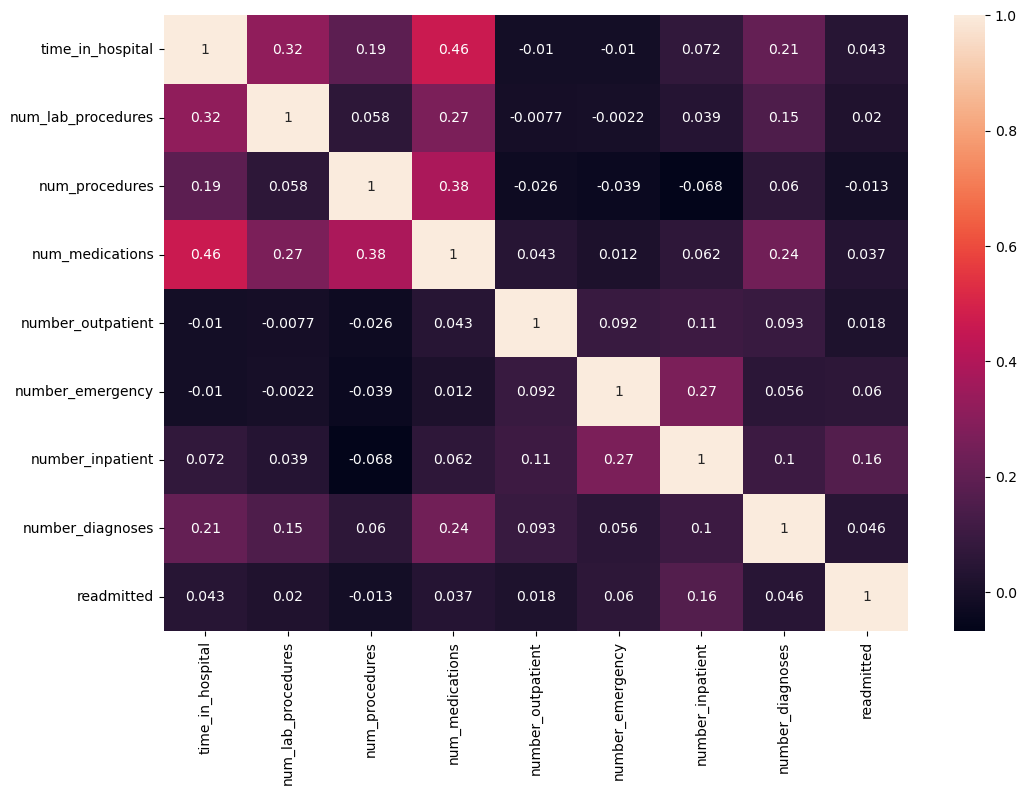

In [91]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include = np.number).corr(), annot = True)
plt.show()

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100241 entries, 0 to 100240
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      100241 non-null  object
 1   gender                    100241 non-null  object
 2   age                       100241 non-null  object
 3   admission_type_id         100241 non-null  object
 4   discharge_disposition_id  100241 non-null  object
 5   admission_source_id       100241 non-null  object
 6   time_in_hospital          100241 non-null  int64 
 7   num_lab_procedures        100241 non-null  int64 
 8   num_procedures            100241 non-null  int64 
 9   num_medications           100241 non-null  int64 
 10  number_outpatient         100241 non-null  int64 
 11  number_emergency          100241 non-null  int64 
 12  number_inpatient          100241 non-null  int64 
 13  diag_1                    100241 non-null  object
 14  diag

In [93]:
df.shape

(100241, 43)

In [94]:
df_num = df.select_dtypes(include = np.number)
df_cat = df.select_dtypes(exclude = np.number)

In [95]:
df_num.shape

(100241, 9)

In [96]:
df_cat.shape

(100241, 34)

In [97]:
df_num.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'readmitted'],
      dtype='object')

In [98]:
df_cat.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

## Hypothisis testing

Null Hypothesis(H0) : Variable is insignificant


Alternate Hypothesis(Ha) : Variable is significant

### Numerical Variables

In [99]:
pval = []
f = []
for i in df_num.columns:
    s, p = stats.ttest_ind(df[df["readmitted"] == 1][i], df[df["readmitted"] == 0][i])
    f.append(i)
    pval.append(p)
pvalue1 = pd.DataFrame({'Feature' : f, 'Pvalue' : pval})

In [100]:
pvalue1[pvalue1["Pvalue"] < 0.05]

,Feature,Pvalue
0,time_in_hospital,1.686269e-42
1,num_lab_procedures,4.668654e-10
2,num_procedures,3.358619e-05
3,num_medications,4.271849e-31
4,number_outpatient,5.466734e-09
5,number_emergency,9.661019e-82
6,number_inpatient,0.000000e+00
7,number_diagnoses,1.947471e-48
8,readmitted,0.000000e+00


Since Pval < 0.05 is true for all variables, we reject the null hypothesis and hence all the variables are significant.

### Categorical Variables

In [101]:
pval = []
f = []
for i in df_cat.columns:
    s,p,d,e = stats.chi2_contingency(pd.crosstab(df[i], df["readmitted"]))
    f.append(i)
    pval.append(p)
pvalue2 = pd.DataFrame({'Feature':f,'Pvalue':pval})

In [102]:
pvalue2[pvalue2['Pvalue'] < 0.05]

,Feature,Pvalue
0,race,1.180196e-04
2,age,9.398980e-16
3,admission_type_id,7.325951e-05
4,discharge_disposition_id,3.145611e-155
5,admission_source_id,2.024046e-08
6,diag_1,9.579385e-31
7,diag_2,1.140139e-14
8,diag_3,2.251208e-20
9,max_glu_serum,4.816856e-04
10,A1Cresult,5.933020e-07


Since Pval < 0.05 is true for these variables, we reject the null hypothesis for these variables and hence these are the significant variables.

## Encoding

In [103]:
for i in df_cat.columns:
    print(i, df_cat[i].nunique())

race 5
gender 2
age 10
admission_type_id 3
discharge_disposition_id 3
admission_source_id 3
diag_1 17
diag_2 17
diag_3 17
max_glu_serum 4
A1Cresult 4
metformin 4
repaglinide 4
nateglinide 4
chlorpropamide 4
glimepiride 4
acetohexamide 2
glipizide 4
glyburide 4
tolbutamide 2
pioglitazone 4
rosiglitazone 4
acarbose 4
miglitol 4
troglitazone 2
tolazamide 3
insulin 4
glyburide-metformin 4
glipizide-metformin 2
glimepiride-pioglitazone 2
metformin-rosiglitazone 2
metformin-pioglitazone 2
change 2
diabetesMed 2


In [104]:
target = ['diag_1','diag_2','diag_3']

In [105]:
target_encoder = ce.TargetEncoder(cols = ['diag_1','diag_2','diag_3'])
df[['diag_1','diag_2','diag_3']] = target_encoder.fit_transform(df[['diag_1','diag_2','diag_3']], df["readmitted"])

In [106]:
df[['diag_1','diag_2','diag_3']]

,diag_1,diag_2,diag_3
0,0.131102,0.110292,0.104412
1,0.055976,0.110292,0.102732
2,0.114938,0.110292,0.106989
3,0.101475,0.149489,0.104412
4,0.114646,0.110525,0.104412
...,...,...,...
100236,0.131102,0.108571,0.106989
100237,0.105518,0.110292,0.122345
100238,0.114938,0.118785,0.113310
100239,0.123500,0.096299,0.115860


In [107]:
label = ['age', 'race', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
         'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
         'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
         'miglitol', 'tolazamide', 'insulin', 'glyburide-metformin']

In [108]:
label_encoder = LabelEncoder()

for i in label:
    df[i] = label_encoder.fit_transform(df[i])

In [109]:
df.dtypes

race                          int32
gender                       object
age                           int32
admission_type_id             int32
discharge_disposition_id      int32
admission_source_id           int32
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                      float64
diag_2                      float64
diag_3                      float64
number_diagnoses              int64
max_glu_serum                 int32
A1Cresult                     int32
metformin                     int32
repaglinide                   int32
nateglinide                   int32
chlorpropamide                int32
glimepiride                   int32
acetohexamide                object
glipizide                     int32
glyburide                     int32
tolbutamide                 

In [110]:
df_new = df

In [111]:
df_new_cat = df_new.select_dtypes(include = np.object)
df_new_num = df_new.select_dtypes(include = np.number).drop(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'readmitted'], axis = 1)

In [112]:
df_new_cat.columns

Index(['gender', 'acetohexamide', 'tolbutamide', 'troglitazone',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed'],
      dtype='object')

In [113]:
df_new_num.columns

Index(['race', 'age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'tolazamide',
       'insulin', 'glyburide-metformin'],
      dtype='object')

In [114]:
encoded_df = pd.get_dummies(df_new_cat, drop_first = True)

In [115]:
encoded_df.head()

,gender_Male,acetohexamide_Steady,tolbutamide_Steady,troglitazone_Steady,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,1
2,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,1,1


In [116]:
df_new_num.head()

,race,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,...,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,tolazamide,insulin,glyburide-metformin
0,2,1,1,0,0,0.131102,0.110292,0.104412,2,2,...,1,1,1,1,1,1,1,0,3,1
1,0,2,1,0,0,0.055976,0.110292,0.102732,2,2,...,1,2,1,1,1,1,1,0,1,1
2,2,3,1,0,0,0.114938,0.110292,0.106989,2,2,...,1,1,1,1,1,1,1,0,3,1
3,2,4,1,0,0,0.101475,0.149489,0.104412,2,2,...,1,2,1,1,1,1,1,0,2,1
4,2,5,1,0,2,0.114646,0.110525,0.104412,2,2,...,1,1,1,1,1,1,1,0,2,1


## Scaling

In [117]:
df_num.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'readmitted'],
      dtype='object')

In [118]:
df_num = df_num.drop(["readmitted"], axis = 1)

In [119]:
ss = StandardScaler()
df_num_scaled = pd.DataFrame(ss.fit_transform(df_num), columns = df_num.columns)

In [120]:
df_num_scaled.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,-0.474822,0.803708,-0.789201,0.231899,-0.292423,-0.213187,-0.506413,0.817042
1,-0.809131,-1.633924,2.133255,-0.384138,1.277330,-0.213187,0.285490,-0.813837
2,-0.809131,0.041948,-0.204710,-0.014516,-0.292423,-0.213187,-0.506413,-0.270210
3,-1.143440,0.397436,-0.789201,-1.000174,-0.292423,-0.213187,-0.506413,-1.357463
4,-0.474822,-0.618244,2.717746,-0.014516,-0.292423,-0.213187,-0.506413,0.817042


In [121]:
X = pd.concat([df_new_num, encoded_df, df_num_scaled], axis = 1)

In [122]:
X.columns

Index(['race', 'age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'tolazamide',
       'insulin', 'glyburide-metformin', 'gender_Male', 'acetohexamide_Steady',
       'tolbutamide_Steady', 'troglitazone_Steady',
       'glipizide-metformin_Steady', 'glimepiride-pioglitazone_Steady',
       'metformin-rosiglitazone_Steady', 'metformin-pioglitazone_Steady',
       'change_No', 'diabetesMed_Yes', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object')

In [123]:
y = df["readmitted"]

In [124]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [125]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(70168, 42)
(30073, 42)
(70168,)
(30073,)


In [126]:
score_card_without_smote = pd.DataFrame(columns=['Model name', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

def update_score_card(model, name):
    
    y_pred_train = model.predict(Xtrain)
    y_pred_test = model.predict(Xtest)
    
    global score_card_without_smote

    score_card_without_smote = score_card_without_smote.append({'Model name' : name,
                                    'AUC Score' : roc_auc_score(ytest, ypred_test),
                                    'Precision Score': precision_score(ytest, ypred_test),
                                    'Recall Score': recall_score(ytest, ypred_test),
                                    'Accuracy Score': accuracy_score(ytest, ypred_test),
                                    'Kappa Score': cohen_kappa_score(ytest, ypred_test),
                                    'f1-score': f1_score(ytest, ypred_test, average='macro')}, 
                                    ignore_index = True)
    
    ConfusionMatrixDisplay.from_predictions(ytest,ypred_test,cmap="Blues")
    plt.show()

    return(score_card_without_smote)

## Logistic Regression without SMOTE

In [127]:
lr_model = LogisticRegression()
lr_model.fit(Xtrain, ytrain)

LogisticRegression()

In [128]:
ypred_test = lr_model.predict(Xtest)

In [129]:
accuracy_score(ytest, ypred_test)

0.8892361919329631

In [130]:
precision_score(ytest, ypred_test)

0.5

In [131]:
recall_score(ytest, ypred_test)

0.015010507355148604

In [132]:
f1_score(ytest, ypred_test)

0.029146021568055958

In [133]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     26742
           1       0.50      0.02      0.03      3331

    accuracy                           0.89     30073
   macro avg       0.70      0.51      0.49     30073
weighted avg       0.85      0.89      0.84     30073



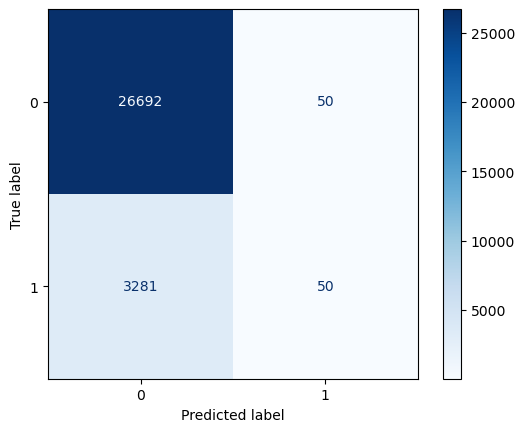

,Model name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression without smote,0.50657,0.5,0.015011,0.889236,0.022837,0.485207


In [134]:
update_score_card(lr_model, 'Logistic Regression without smote')

## KNN without SMOTE

In [135]:
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)

KNeighborsClassifier()

In [136]:
ypred_test = knn.predict(Xtest)

In [137]:
accuracy_score(ytest, ypred_test)

0.879193961360689

In [138]:
precision_score(ytest, ypred_test)

0.2378472222222222

In [139]:
recall_score(ytest, ypred_test)

0.04112879015310718

In [140]:
f1_score(ytest, ypred_test)

0.07013053493729204

In [141]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94     26742
           1       0.24      0.04      0.07      3331

    accuracy                           0.88     30073
   macro avg       0.56      0.51      0.50     30073
weighted avg       0.82      0.88      0.84     30073



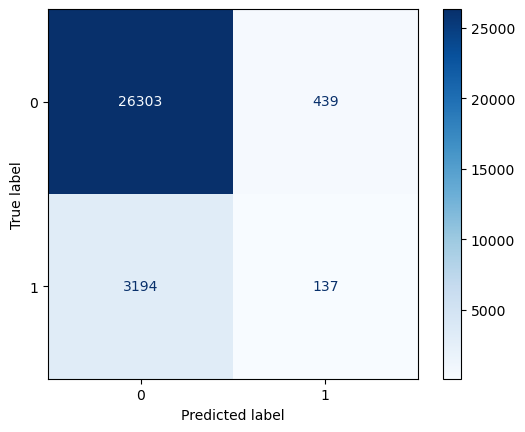

,Model name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression without smote,0.506570,0.500000,0.015011,0.889236,0.022837,0.485207
1,KNN without smote,0.512356,0.237847,0.041129,0.879194,0.038736,0.502766


In [142]:
update_score_card(knn, 'KNN without smote')

## Decision Tree Classifier without SMOTE

In [143]:
dt = DecisionTreeClassifier()
dt.fit(Xtrain, ytrain)

DecisionTreeClassifier()

In [144]:
ypred_test = dt.predict(Xtest)

In [145]:
accuracy_score(ytest, ypred_test)

0.7909420410334852

In [146]:
recall_score(ytest, ypred_test)

0.1795256679675773

In [147]:
precision_score(ytest, ypred_test)

0.14402697495183045

In [148]:
f1_score(ytest, ypred_test)

0.15982894561004943

In [149]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     26742
           1       0.14      0.18      0.16      3331

    accuracy                           0.79     30073
   macro avg       0.52      0.52      0.52     30073
weighted avg       0.81      0.79      0.80     30073



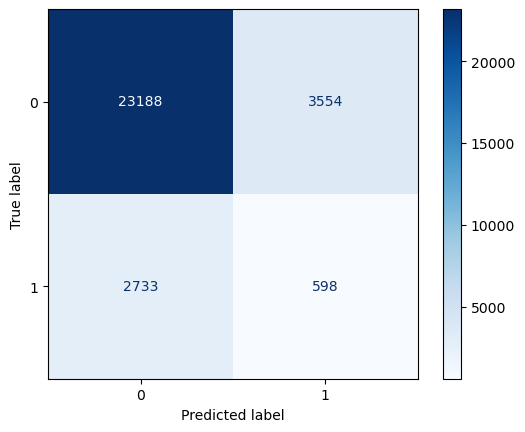

,Model name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression without smote,0.506570,0.500000,0.015011,0.889236,0.022837,0.485207
1,KNN without smote,0.512356,0.237847,0.041129,0.879194,0.038736,0.502766
2,Decision Tree without smote,0.523313,0.144027,0.179526,0.790942,0.042086,0.520224


In [150]:
update_score_card(dt, 'Decision Tree without smote')

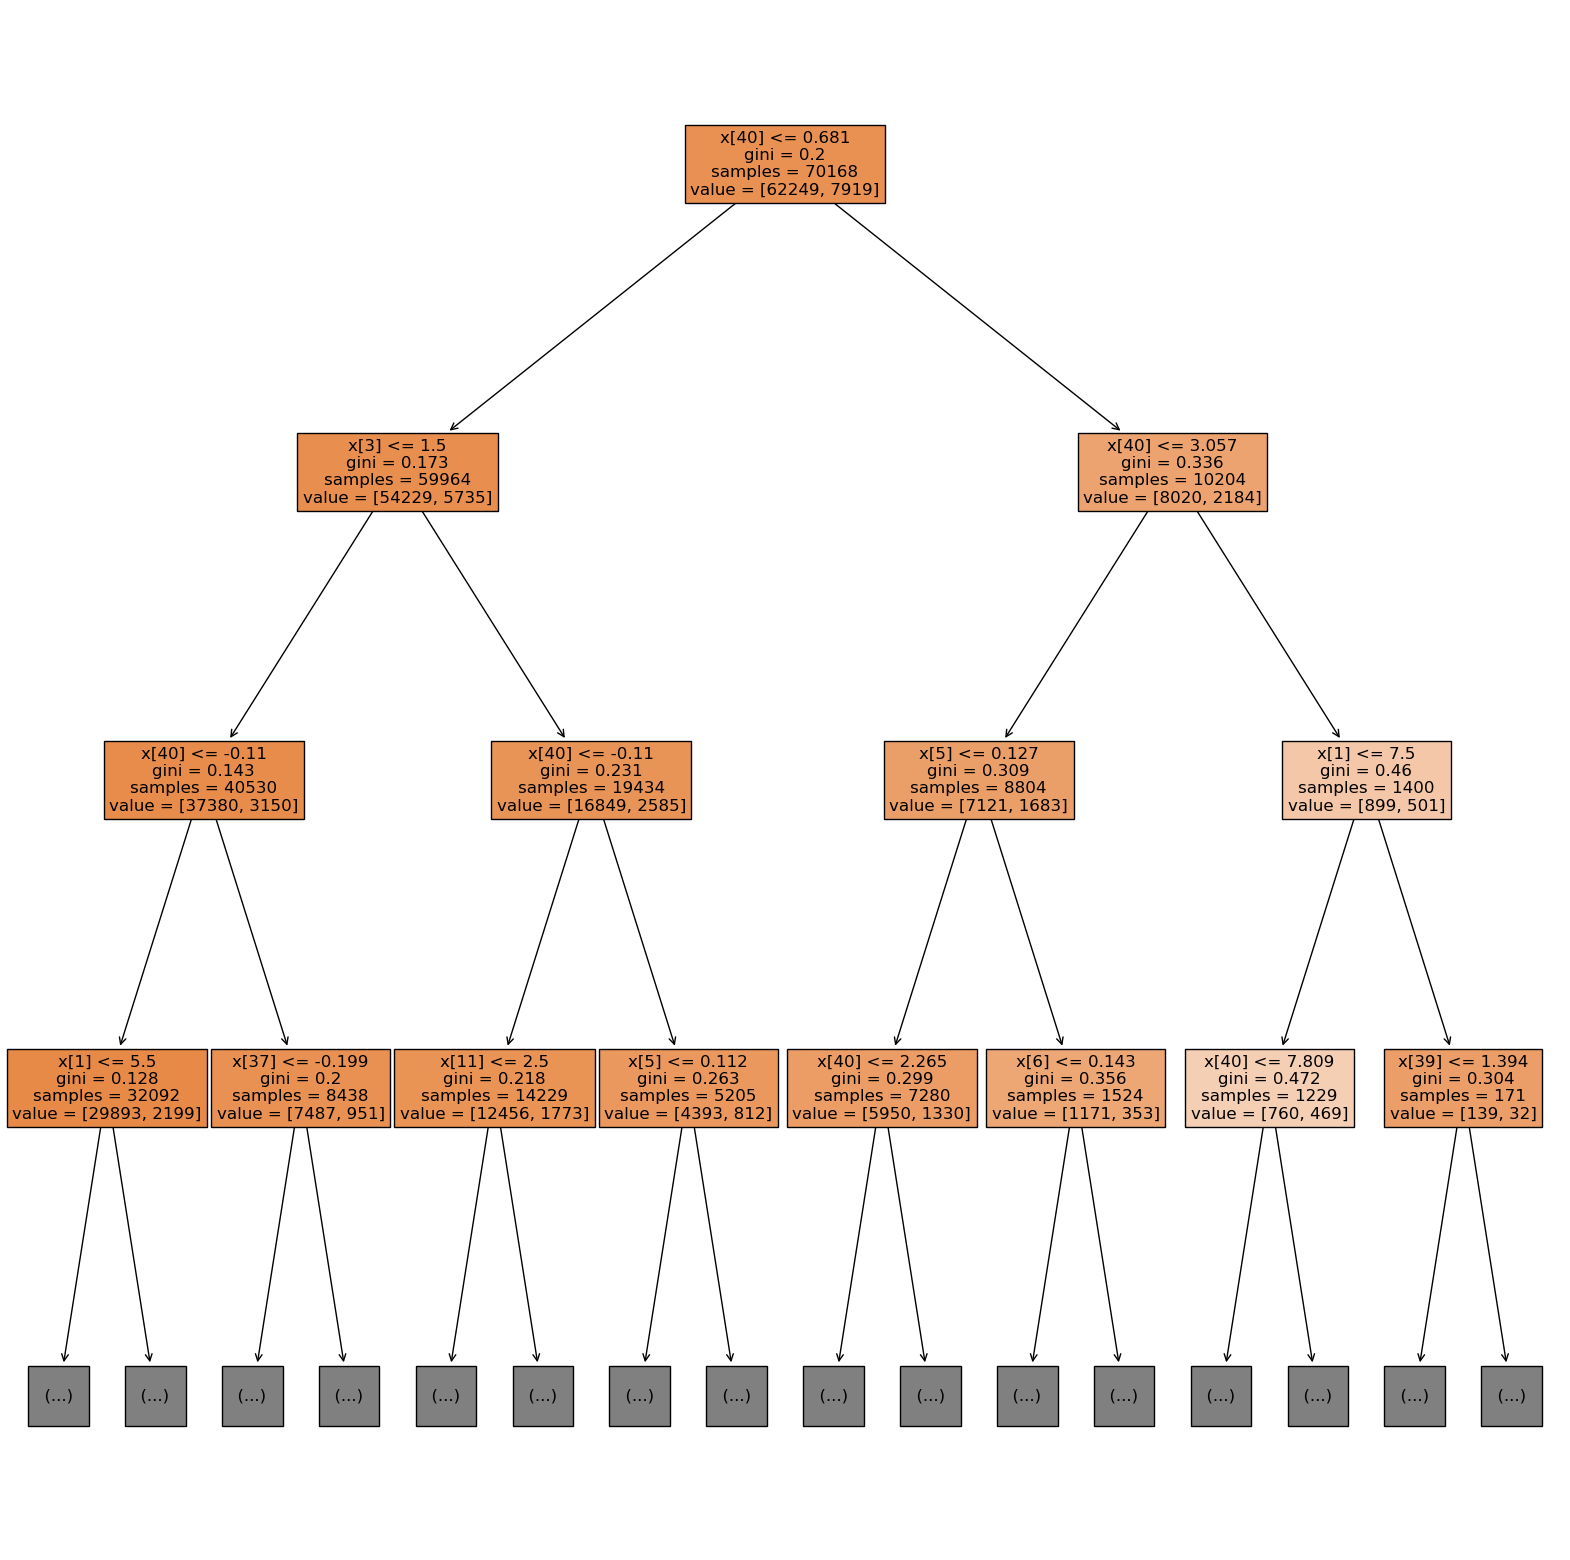

In [151]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt,fontsize=12,filled=True,max_depth=3)
plt.show()

## Random Forest Classifier without SMOTE

In [152]:
rf = RandomForestClassifier()
rf.fit(Xtrain, ytrain)

RandomForestClassifier()

In [153]:
ypred_test = rf.predict(Xtest)

In [154]:
accuracy_score(ytest, ypred_test)

0.8893359491903036

In [155]:
recall_score(ytest, ypred_test)

0.006904833383368358

In [156]:
precision_score(ytest, ypred_test)

0.5348837209302325

In [157]:
f1_score(ytest, ypred_test)

0.013633669235328988

In [158]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     26742
           1       0.53      0.01      0.01      3331

    accuracy                           0.89     30073
   macro avg       0.71      0.50      0.48     30073
weighted avg       0.85      0.89      0.84     30073



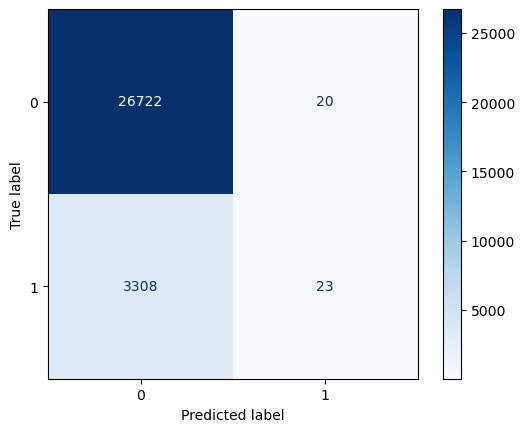

,Model name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression without smote,0.506570,0.500000,0.015011,0.889236,0.022837,0.485207
1,KNN without smote,0.512356,0.237847,0.041129,0.879194,0.038736,0.502766
2,Decision Tree without smote,0.523313,0.144027,0.179526,0.790942,0.042086,0.520224
3,Random forest without smote,0.503078,0.534884,0.006905,0.889336,0.010841,0.477507


In [159]:
update_score_card(rf, 'Random forest without smote')

### Gradient Descend without SMOTE

In [160]:
gb_model = GradientBoostingClassifier()
gb_model.fit(Xtrain,ytrain)

GradientBoostingClassifier()

In [161]:
ypred_test = gb_model.predict(Xtest)

In [162]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     26742
           1       0.59      0.01      0.02      3331

    accuracy                           0.89     30073
   macro avg       0.74      0.50      0.48     30073
weighted avg       0.86      0.89      0.84     30073



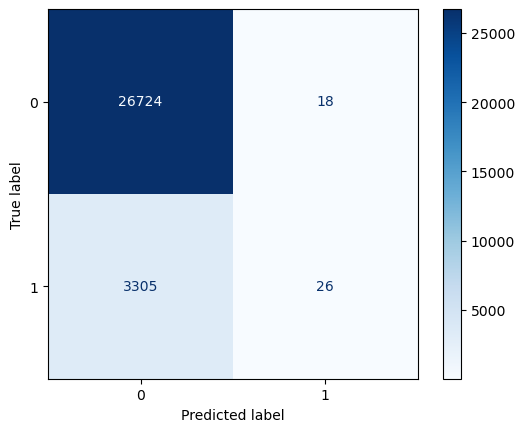

,Model name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression without smote,0.506570,0.500000,0.015011,0.889236,0.022837,0.485207
1,KNN without smote,0.512356,0.237847,0.041129,0.879194,0.038736,0.502766
2,Decision Tree without smote,0.523313,0.144027,0.179526,0.790942,0.042086,0.520224
3,Random forest without smote,0.503078,0.534884,0.006905,0.889336,0.010841,0.477507
4,Gradient descend without SMOTE,0.503566,0.590909,0.007805,0.889502,0.012556,0.478437


In [163]:
update_score_card(gb_model, 'Gradient descend without SMOTE')

### ADA boost without SMOTE

In [164]:
dtf = DecisionTreeClassifier()
ada_boost = AdaBoostClassifier(dtf)
ada_boost.fit(Xtrain, ytrain)

AdaBoostClassifier(estimator=DecisionTreeClassifier())

In [165]:
ypred_test = ada_boost.predict(Xtest)

In [166]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88     26742
           1       0.15      0.18      0.16      3331

    accuracy                           0.79     30073
   macro avg       0.52      0.53      0.52     30073
weighted avg       0.81      0.79      0.80     30073



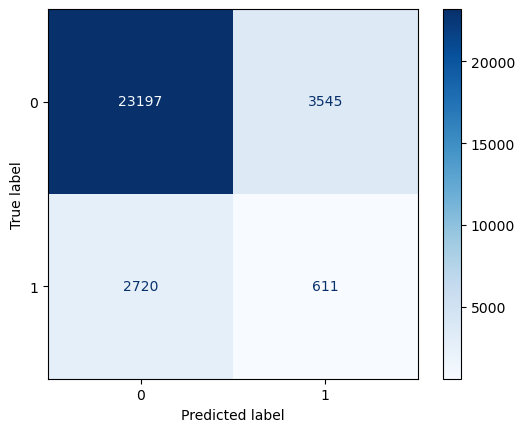

,Model name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression without smote,0.506570,0.500000,0.015011,0.889236,0.022837,0.485207
1,KNN without smote,0.512356,0.237847,0.041129,0.879194,0.038736,0.502766
2,Decision Tree without smote,0.523313,0.144027,0.179526,0.790942,0.042086,0.520224
3,Random forest without smote,0.503078,0.534884,0.006905,0.889336,0.010841,0.477507
4,Gradient descend without SMOTE,0.503566,0.590909,0.007805,0.889502,0.012556,0.478437
5,ADA boost without SMOTE,0.525433,0.147016,0.183428,0.791674,0.045890,0.522122


In [167]:
update_score_card(ada_boost, 'ADA boost without SMOTE')

### SMOTE Technique

In [168]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 88991, 1: 11250})


In [169]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(Xtrain, ytrain)

In [170]:
counter = Counter(y_sm)
print(counter)

Counter({0: 62249, 1: 62249})


In [171]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.3, random_state=10)

print('X_train', X_train_sm.shape)
print('y_train', y_train_sm.shape)

print('X_test', X_test_sm.shape)
print('y_test', y_test_sm.shape)

X_train (87148, 42)
y_train (87148,)
X_test (37350, 42)
y_test (37350,)


In [172]:
score_card_with_smote = pd.DataFrame(columns=['Model name', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

def update_score_card_sm(model, name):
    
    y_pred_train = model.predict(X_train_sm)
    y_pred_test = model.predict(X_test_sm)
    
    global score_card_with_smote

    score_card_with_smote = score_card_with_smote.append({'Model name' : name,
                                    'AUC Score' : roc_auc_score(y_test_sm, y_pred_test),
                                    'Precision Score': precision_score(y_test_sm, y_pred_test),
                                    'Recall Score': recall_score(y_test_sm, y_pred_test),
                                    'Accuracy Score': accuracy_score(y_test_sm, y_pred_test),
                                    'Kappa Score': cohen_kappa_score(y_test_sm, y_pred_test),
                                    'f1-score': f1_score(y_test_sm, y_pred_test, average='macro')}, 
                                    ignore_index = True)
    
    
    ConfusionMatrixDisplay.from_predictions(y_test_sm,ypred_test,cmap="Blues")
    plt.show()

    return(score_card_with_smote)

### Logistic Regression with SMOTE

In [173]:
logistic_reg_sm = LogisticRegression()
logistic_reg_sm.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [174]:
ypred_test = logistic_reg_sm.predict(X_test_sm)

In [175]:
print(classification_report(y_test_sm, ypred_test))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66     18715
           1       0.66      0.66      0.66     18635

    accuracy                           0.66     37350
   macro avg       0.66      0.66      0.66     37350
weighted avg       0.66      0.66      0.66     37350



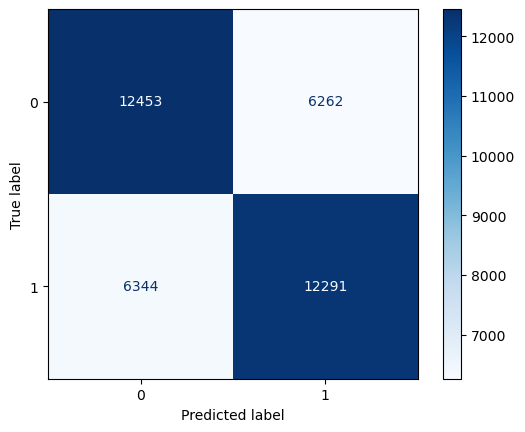

,Model name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression with SMOTE,0.662484,0.66248,0.659565,0.66249,0.32497,0.662484


In [176]:
update_score_card_sm(logistic_reg_sm, 'Logistic Regression with SMOTE')

### KNN with SMOTE

In [177]:
knn_sm = KNeighborsClassifier()
knn_sm.fit(X_train_sm, y_train_sm)

KNeighborsClassifier()

In [178]:
ypred_test = knn_sm.predict(X_test_sm)

In [179]:
print(classification_report(y_test_sm, ypred_test))

              precision    recall  f1-score   support

           0       0.97      0.59      0.73     18715
           1       0.71      0.98      0.82     18635

    accuracy                           0.79     37350
   macro avg       0.84      0.79      0.78     37350
weighted avg       0.84      0.79      0.78     37350



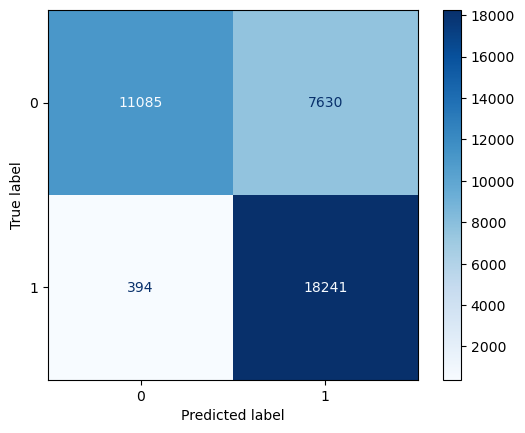

,Model name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression with SMOTE,0.662484,0.662480,0.659565,0.662490,0.324970,0.662484
1,KNN with SMOTE,0.785581,0.705075,0.978857,0.785167,0.570689,0.776981


In [180]:
update_score_card_sm(knn_sm, 'KNN with SMOTE')

### Decision Tree with SMOTE

In [181]:
#n_iter = 70

#dc_model=DecisionTreeClassifier()

#params = {'criterion': ['entropy', 'gini'],
# 'max_depth': range(2, 10),
# 'min_samples_split': range(2,10),
#  'max_leaf_nodes':range(2,10)}


# Randomsearchcv
#reg_dec = RandomizedSearchCV(dc_model,
#                         param_distributions=params,
#                         n_iter=n_iter,
#                         cv=5,
#                         n_jobs=8,
#                         scoring='roc_auc',
#                         random_state=123)

#model_dec= reg_dec.fit(X_train, y_train)


#model_dec.best_params_

In [182]:
dt_model_sm = DecisionTreeClassifier(min_samples_split=7, max_depth=6, criterion='entropy', max_leaf_nodes=9)
dt_model_sm.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=9,
                       min_samples_split=7)

In [183]:
ypred_test = dt_model_sm.predict(X_test_sm)

In [184]:
print(classification_report(y_test_sm, ypred_test))

              precision    recall  f1-score   support

           0       0.68      0.87      0.76     18715
           1       0.82      0.58      0.68     18635

    accuracy                           0.73     37350
   macro avg       0.75      0.73      0.72     37350
weighted avg       0.75      0.73      0.72     37350



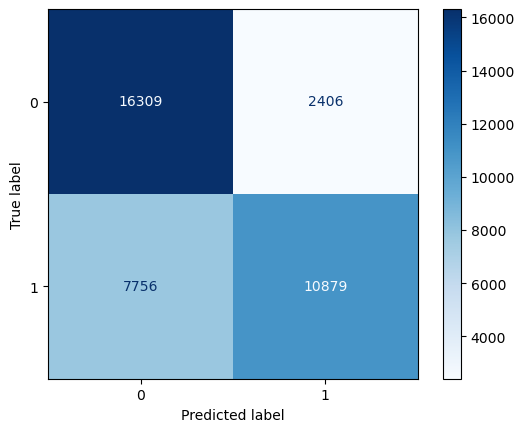

,Model name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression with SMOTE,0.662484,0.662480,0.659565,0.662490,0.324970,0.662484
1,KNN with SMOTE,0.785581,0.705075,0.978857,0.785167,0.570689,0.776981
2,Decision tree with SMOTE,0.727617,0.818893,0.583794,0.727925,0.455513,0.722050


In [185]:
update_score_card_sm(dt_model_sm, 'Decision tree with SMOTE')

### Random forest with SMOTE

In [186]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import loguniform, randint

#n_iter = 70

#rf_model=RandomForestClassifier()

#params = {'criterion': ['entropy', 'gini'],'n_estimators': [ 150,180, 200],
 #'max_depth': [15,18,20],
 #'min_samples_split': range(4,6)}

# Random
#reg_rand = RandomizedSearchCV(rf_model,
#                         param_distributions=params,
#                          n_iter=n_iter,
#                          cv=5,
#                          n_jobs=8,
#                          scoring='roc_auc',
#                          random_state=123)

#model_rand= reg_rand.fit(X_train, y_train)

#model_rand.best_params_

In [187]:
rf_model_sm =RandomForestClassifier(n_estimators= 180,min_samples_split= 5,max_depth= 15,criterion= 'entropy')
rf_model_sm.fit(X_train_sm, y_train_sm)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=5,
                       n_estimators=180)

In [188]:
ypred_test = rf_model_sm.predict(X_test_sm)

In [189]:
print(classification_report(y_test_sm, ypred_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     18715
           1       0.94      0.84      0.89     18635

    accuracy                           0.89     37350
   macro avg       0.90      0.89      0.89     37350
weighted avg       0.90      0.89      0.89     37350



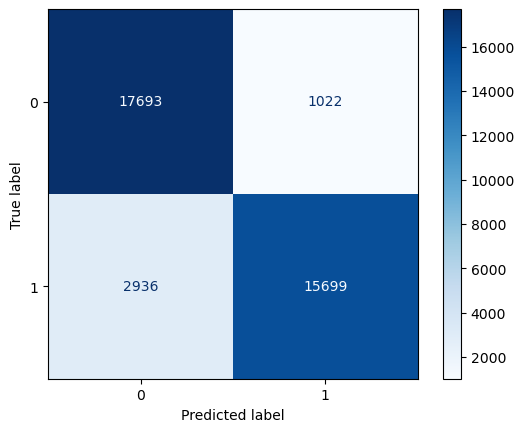

,Model name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression with SMOTE,0.662484,0.662480,0.659565,0.662490,0.324970,0.662484
1,KNN with SMOTE,0.785581,0.705075,0.978857,0.785167,0.570689,0.776981
2,Decision tree with SMOTE,0.727617,0.818893,0.583794,0.727925,0.455513,0.722050
3,Random forest with SMOTE,0.893919,0.938879,0.842447,0.894029,0.788011,0.893727


In [190]:
update_score_card_sm(rf_model_sm, 'Random forest with SMOTE')

### ADA boost with SMOTE

In [191]:
#n_iter = 70


#ada_model=AdaBoostClassifier()

#tuned_parameters={'n_estimators':[100, 120, 150],'learning_rate':[0.1, 0.01, 0.001, 0.15, 0.015] }


# Random
#reg_dec = RandomizedSearchCV(ada_model,
#                         param_distributions=tuned_parameters,
#                         n_iter=n_iter,
#                         cv=5,
#                         n_jobs=8,
#                         scoring='roc_auc',
#                         random_state=123)
#reg_dec.fit(X_train,y_train)

#reg_dec.best_params_

In [192]:
dc_sm = DecisionTreeClassifier()
ada_model_sm = AdaBoostClassifier(dc_sm,n_estimators=150,learning_rate=0.15)
ada_model_sm.fit(X_train_sm,y_train_sm)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.15,
                   n_estimators=150)

In [193]:
ypred_test = ada_model_sm.predict(X_test_sm)

In [194]:
print(classification_report(y_test_sm, ypred_test))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     18715
           1       0.86      0.89      0.87     18635

    accuracy                           0.87     37350
   macro avg       0.87      0.87      0.87     37350
weighted avg       0.87      0.87      0.87     37350



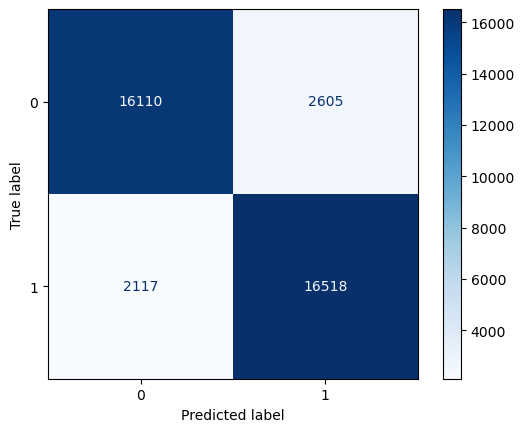

,Model name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression with SMOTE,0.662484,0.662480,0.659565,0.662490,0.324970,0.662484
1,KNN with SMOTE,0.785581,0.705075,0.978857,0.785167,0.570689,0.776981
2,Decision tree with SMOTE,0.727617,0.818893,0.583794,0.727925,0.455513,0.722050
3,Random forest with SMOTE,0.893919,0.938879,0.842447,0.894029,0.788011,0.893727
4,ADA Boost with SMOTE,0.873602,0.863777,0.886397,0.873574,0.747162,0.873559


In [195]:
update_score_card_sm(ada_model_sm, 'ADA Boost with SMOTE')

### Randomizied XG boost with SMOTE

In [196]:
#from sklearn.model_selection import RandomizedSearchCV
#from scipy.stats import loguniform, randint

#n_iter = 70

#xgb_model = XGBClassifier()

#XGB_params=[{'n_estimators' : [100,120,150],'learning_rate': [0.1, 0.01,0.001,0.15,0.015],'gamma':[2,3,4,5,6],
#             'max_depth' : [2,3,4,5,6]}]
#reg_rand = RandomizedSearchCV(xgb_model,
#                         param_distributions=XGB_params,
#                         n_iter=n_iter,
#                         cv=5,
#                         n_jobs=8,
#                         scoring='roc_auc',
#                         random_state=123)
#reg_rand.fit(X_train,y_train)

In [197]:
xgb_model_sm = XGBClassifier(n_estimators=150,max_depth=6,learning_rate=0.1,gamma=5)
xgb_model_sm.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [198]:
ypred_test = xgb_model_sm.predict(X_test_sm)

In [199]:
print(classification_report(y_test_sm, ypred_test))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     18715
           1       1.00      0.86      0.92     18635

    accuracy                           0.93     37350
   macro avg       0.94      0.93      0.93     37350
weighted avg       0.94      0.93      0.93     37350



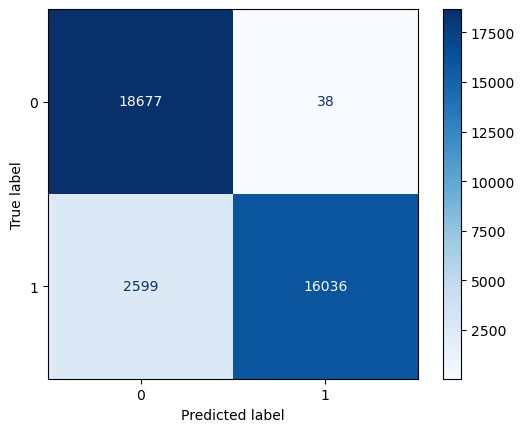

,Model name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression with SMOTE,0.662484,0.662480,0.659565,0.662490,0.324970,0.662484
1,KNN with SMOTE,0.785581,0.705075,0.978857,0.785167,0.570689,0.776981
2,Decision tree with SMOTE,0.727617,0.818893,0.583794,0.727925,0.455513,0.722050
3,Random forest with SMOTE,0.893919,0.938879,0.842447,0.894029,0.788011,0.893727
4,ADA Boost with SMOTE,0.873602,0.863777,0.886397,0.873574,0.747162,0.873559
5,Randomizied XG boost with SMOTE,0.929250,0.997636,0.860531,0.929398,0.858753,0.929043


In [200]:
update_score_card_sm(xgb_model_sm, 'Randomizied XG boost with SMOTE')

### Randomizied Gradient boost with SMOTE

In [201]:
#gb_model1 = GradientBoostingClassifier()
#params={'n_estimators':range(2,11),'max_depth':range(2,11)}
#gb_grid=GridSearchCV(estimator=gb_model1,param_grid=params)
#gb_grid.fit(X_train_sm,y_train_sm)

In [202]:
gb_model_sm = GradientBoostingClassifier(n_estimators=10,max_depth =10)
gb_model_sm.fit(X_train_sm,y_train_sm)


GradientBoostingClassifier(max_depth=10, n_estimators=10)

In [203]:
ypred_test = xgb_model_sm.predict(X_test_sm)

In [204]:
print(classification_report(y_test_sm, ypred_test))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     18715
           1       1.00      0.86      0.92     18635

    accuracy                           0.93     37350
   macro avg       0.94      0.93      0.93     37350
weighted avg       0.94      0.93      0.93     37350



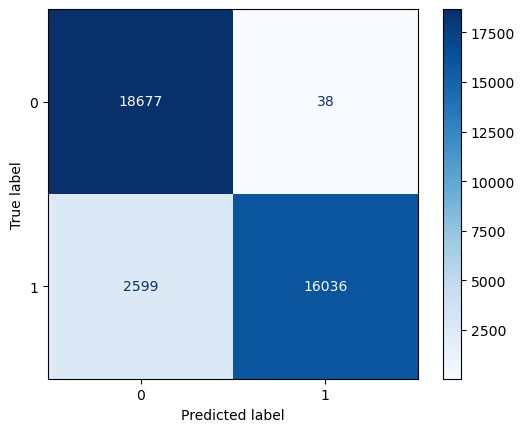

,Model name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression with SMOTE,0.662484,0.662480,0.659565,0.662490,0.324970,0.662484
1,KNN with SMOTE,0.785581,0.705075,0.978857,0.785167,0.570689,0.776981
2,Decision tree with SMOTE,0.727617,0.818893,0.583794,0.727925,0.455513,0.722050
3,Random forest with SMOTE,0.893919,0.938879,0.842447,0.894029,0.788011,0.893727
4,ADA Boost with SMOTE,0.873602,0.863777,0.886397,0.873574,0.747162,0.873559
5,Randomizied XG boost with SMOTE,0.929250,0.997636,0.860531,0.929398,0.858753,0.929043
6,Randomizied Gradient boost with SMOTE,0.898884,0.964616,0.828012,0.899036,0.798010,0.898498


In [205]:
update_score_card_sm(gb_model_sm, 'Randomizied Gradient boost with SMOTE')